<a href="https://colab.research.google.com/github/anmo1987/Final_project_Artefact/blob/main/Copy_of_Image_Analysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [1]:
###Import libraries
import os
import pandas as pd
from PIL import Image
import numpy as np
import random
import seaborn as sns
##from sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

### sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier

### tensorflow
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator



##IMPORT DATASET FROM KAGGLE
SKIN CANCER DATASET

In [6]:
###IMPORT DATASET TO GOOGLE COLLAB
###Download API token from kaggle and store the .json file to content folder
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
##import data csv
!unzip skin-cancer-mnist-ham10000.zip -d /content/skin_cancer_dataset
y

mv: cannot stat 'kaggle.json': No such file or directory
skin-cancer-mnist-ham10000.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  skin-cancer-mnist-ham10000.zip
replace /content/skin_cancer_dataset/HAM10000_images_part_1/ISIC_0024306.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
##MOVE ALL PICTURES IN THE SAME DIR
!mv /content/skin_cancer_dataset/HAM10000_images_part_2/*.jpg /content/skin_cancer_dataset/HAM10000_images_part_1/
#REMOVE FOLDERS
!rm -r /content/skin_cancer_dataset/ham10000_images_part_2
!rm -r /content/skin_cancer_dataset/ham10000_images_part_1
!rm -r /content/skin_cancer_dataset/HAM10000_images_part_2/



In [8]:
###cHECK IMPORTED DATA
project_dir = '/content/skin_cancer_dataset/'
image_dir = '/content/skin_cancer_dataset/HAM10000_images_part_1'
# Create lists to store image arrays and labels
!ls -la $image_dir/*jpg | wc -l

10015


###IMPORT DATA TO NOTEBOOK FOR ANALYSIS
Two files to be imported, a csv file and 10015 images in .jpg

In [22]:
###Import images into Dataframe
data = pd.read_csv('/content/skin_cancer_dataset/HAM10000_metadata.csv')
data['image_id_ext'] = data["image_id"] + '.jpg'
data

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_id_ext
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,ISIC_0032854.jpg


In [10]:
##Look the data structure
data = data.sort_values(by=['image_id'])

In [23]:
##Transform y categorical to numeric
# Handling categorical data
encoder = LabelEncoder()
data["dx_label"] = encoder.fit_transform(data["dx"])

# Print new labels and correspondances
print("Cancer types and their integer encoding")
print(encoder.classes_)
print(encoder.transform(encoder.classes_))

Cancer types and their integer encoding
['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
[0 1 2 3 4 5 6]


DISPLAY ONE IMAGE AND LOOKING FOR SHAPE

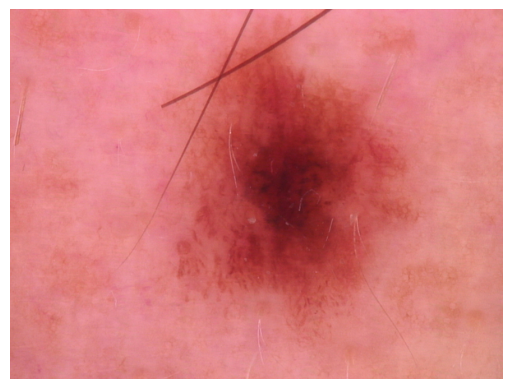

In [11]:
##DISPLAY A SINGLE IMAGE
##View image
from matplotlib import  pyplot as plt
import matplotlib.image as mpimg
import glob

img = mpimg.imread('/content/skin_cancer_dataset/HAM10000_images/ISIC_0024306.jpg')
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [12]:
#Check image shape
img.shape

(450, 600, 3)

IMPORT ALL IMAGES IN A FILE IN FORMAT 28,28,3

In [20]:
%%time
##IMPORT ALL IMAGES IN A FILES and resized them in 28 / 28
dataset_directory = '/content/skin_cancer_dataset/HAM10000_images'
images = []
labels = []
flattened_images = []

for image_filename in os.listdir(dataset_directory):
    image_path = os.path.join(dataset_directory, image_filename)

    # Read and preprocess the image (resize 28 28)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    img = cv2.resize(img, (28, 28))  # Resize the image to a common size
    img_scaled = img/255.0

    # Extract the label from the filename
    label = image_filename.split('.')[0]
    flattened_image = img_scaled.reshape(-1)

    # Append the image and its label to the lists.
    images.append(img)
    labels.append(label)
    flattened_images.append(flattened_image)

flattened_images = np.array(flattened_images)
images = np.array(images)
labels = np.array(labels)



CPU times: user 1min 50s, sys: 7.78 s, total: 1min 58s
Wall time: 2min 31s


In [24]:
###create the y value from csv and labels array
# Create a dictionary to map image IDs to dx_labels.
image_id_to_dx_label = dict(zip(data['image_id'], data['dx_label']))
dx_labels = np.array([image_id_to_dx_label.get(image_id, -1) for image_id in labels])
y = dx_labels

In [25]:
##saved flattened images size 28 * 28
df = pd.DataFrame(flattened_images)
df["y"] = y
df["labels_id"] = labels
df.to_csv("/content/skin_cancer_dataset/image_scaled_flatten.csv")


In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,y,labels_id
0,0.870588,0.756863,0.862745,0.909804,0.835294,0.909804,0.929412,0.843137,0.921569,0.921569,...,0.831373,0.890196,0.874510,0.768627,0.854902,0.901961,0.827451,0.909804,2,ISIC_0033629
1,0.835294,0.752941,0.756863,0.866667,0.800000,0.788235,0.870588,0.831373,0.870588,0.882353,...,0.843137,0.862745,0.886275,0.827451,0.823529,0.886275,0.839216,0.858824,4,ISIC_0030211
2,0.898039,0.556863,0.686275,0.901961,0.603922,0.686275,0.921569,0.631373,0.717647,0.901961,...,0.517647,0.603922,0.835294,0.533333,0.615686,0.827451,0.545098,0.580392,5,ISIC_0024859
3,0.796078,0.658824,0.662745,0.800000,0.662745,0.662745,0.831373,0.709804,0.705882,0.815686,...,0.447059,0.486275,0.596078,0.462745,0.513725,0.513725,0.360784,0.372549,1,ISIC_0025530
4,0.682353,0.643137,0.768627,0.678431,0.627451,0.721569,0.686275,0.631373,0.701961,0.717647,...,0.588235,0.603922,0.643137,0.576471,0.560784,0.639216,0.576471,0.607843,5,ISIC_0032957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.945098,0.596078,0.639216,0.945098,0.592157,0.658824,0.937255,0.592157,0.654902,0.952941,...,0.666667,0.623529,0.933333,0.647059,0.623529,0.913725,0.647059,0.607843,5,ISIC_0026495
10011,0.635294,0.427451,0.376471,0.643137,0.415686,0.333333,0.643137,0.364706,0.329412,0.654902,...,0.435294,0.431373,0.552941,0.415686,0.403922,0.439216,0.286275,0.223529,1,ISIC_0028323
10012,0.960784,0.658824,0.737255,0.960784,0.678431,0.756863,0.952941,0.635294,0.717647,0.956863,...,0.627451,0.658824,0.905882,0.619608,0.639216,0.850980,0.600000,0.615686,5,ISIC_0028501
10013,0.882353,0.572549,0.600000,0.894118,0.560784,0.592157,0.870588,0.568627,0.588235,0.878431,...,0.533333,0.545098,0.807843,0.517647,0.513725,0.772549,0.498039,0.478431,5,ISIC_0024533


In [27]:
###IF WE WANT TO RESTART FROM THE FLATTEN CSV FILE
# Load the CSV file containing flattened image data and labels.
df = pd.read_csv('/content/skin_cancer_dataset/image_scaled_flatten.csv')

# Extract flattened image data and labels.
y = np.array(df["y"])
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('labels_id', axis=1)
df = df.drop('y', axis=1)

# Reshape flattened image data back to original dimensions (assuming 224x224x3).

original_shape = (len(df), 28, 28, 3)
array_data = df.to_numpy()
images_from_csv = array_data.reshape(original_shape)
images_from_csv.shape


<ipython-input-27-c78e35c0381a>:3: DtypeWarning: Columns (1463) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/skin_cancer_dataset/image_scaled_flatten.csv')


(10087, 28, 28, 3)

In [ ]:
###create the y value from csv and labels array
# Create a dictionary to map image IDs to dx_labels.
image_id_to_dx_label = dict(zip(data['image_id'], data['dx_label']))
dx_labels = np.array([image_id_to_dx_label.get(image_id, -1) for image_id in labels])
y = dx_labels

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0.870588,0.756863,0.862745,0.909804,0.835294,0.909804,0.929412,0.843137,0.921569,0.921569,...,0.890196,0.831373,0.890196,0.874510,0.768627,0.854902,0.901961,0.827451,0.909804,2
1,0.835294,0.752941,0.756863,0.866667,0.800000,0.788235,0.870588,0.831373,0.870588,0.882353,...,0.886275,0.843137,0.862745,0.886275,0.827451,0.823529,0.886275,0.839216,0.858824,4
2,0.898039,0.556863,0.686275,0.901961,0.603922,0.686275,0.921569,0.631373,0.717647,0.901961,...,0.854902,0.517647,0.603922,0.835294,0.533333,0.615686,0.827451,0.545098,0.580392,5
3,0.796078,0.658824,0.662745,0.800000,0.662745,0.662745,0.831373,0.709804,0.705882,0.815686,...,0.596078,0.447059,0.486275,0.596078,0.462745,0.513725,0.513725,0.360784,0.372549,1
4,0.682353,0.643137,0.768627,0.678431,0.627451,0.721569,0.686275,0.631373,0.701961,0.717647,...,0.674510,0.588235,0.603922,0.643137,0.576471,0.560784,0.639216,0.576471,0.607843,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.945098,0.596078,0.639216,0.945098,0.592157,0.658824,0.937255,0.592157,0.654902,0.952941,...,0.933333,0.666667,0.623529,0.933333,0.647059,0.623529,0.913725,0.647059,0.607843,5
10011,0.635294,0.427451,0.376471,0.643137,0.415686,0.333333,0.643137,0.364706,0.329412,0.654902,...,0.607843,0.435294,0.431373,0.552941,0.415686,0.403922,0.439216,0.286275,0.223529,1
10012,0.960784,0.658824,0.737255,0.960784,0.678431,0.756863,0.952941,0.635294,0.717647,0.956863,...,0.913725,0.627451,0.658824,0.905882,0.619608,0.639216,0.850980,0.600000,0.615686,5
10013,0.882353,0.572549,0.600000,0.894118,0.560784,0.592157,0.870588,0.568627,0.588235,0.878431,...,0.811765,0.533333,0.545098,0.807843,0.517647,0.513725,0.772549,0.498039,0.478431,5


In [ ]:
##Look out the shape for the two files

print(f'Images downloaded shape : {images.shape}\n Labels shape : {labels.shape}\n Flatten images scaled shae : {flattened_images.shape}')

Images downloaded shape : (10015, 28, 28, 3)
 Labels shape : (10015,)
 Flatten images scaled shae : (10015, 2352)


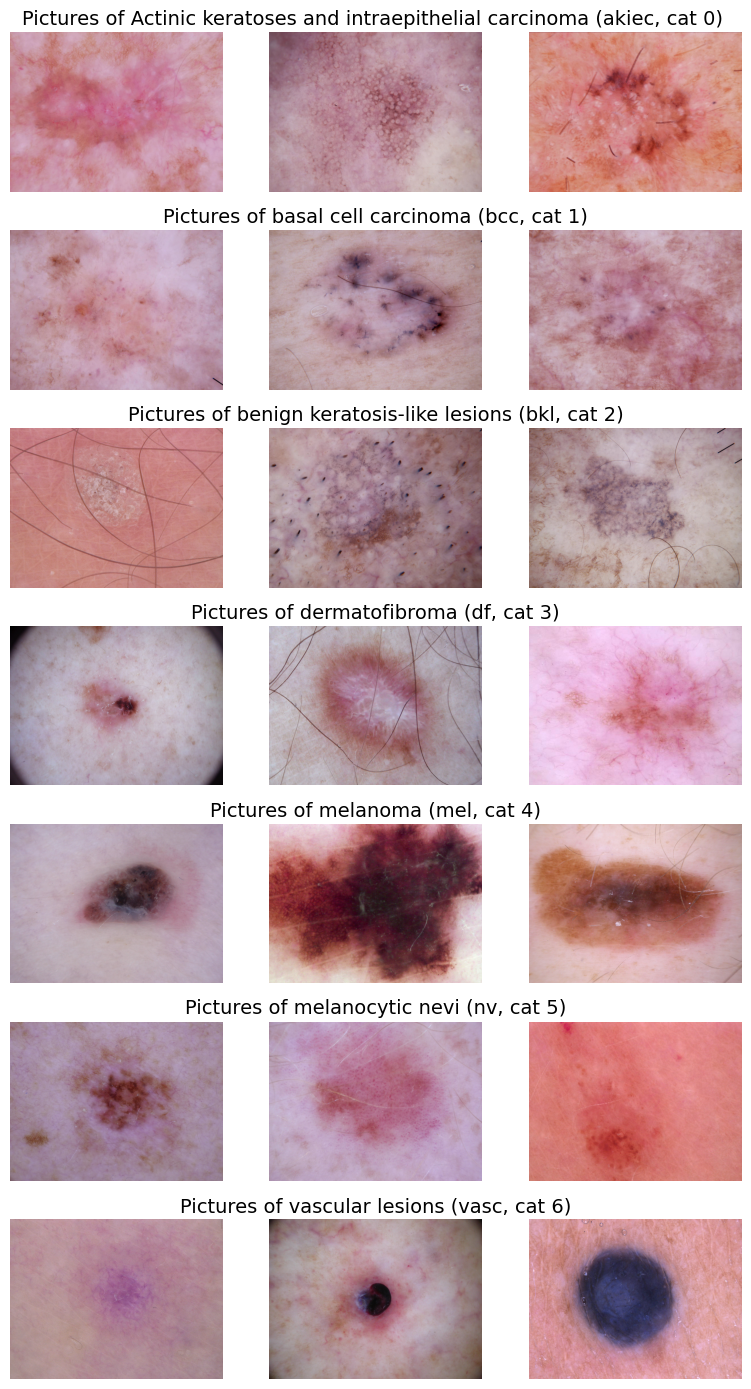

In [ ]:
# Create a dictionary to store two random image filenames from each category.
category_images = {}
num_categories = 5  # Assuming you have 7 categories.
image_dir = '/content/skin_cancer_dataset/HAM10000_images'
# Collect two random image filenames from each category.
# Create a dictionary to store two random image filenames from each category.
category_images = {}
num_categories = 7  # Assuming you have 7 categories.

# Collect two random image filenames from each category.
for category in range(num_categories):
    category_data = data[data['dx_label'] == category]
    image_filenames = category_data['image_id_ext'].tolist()

    # Shuffle the image filenames to get random samples.
    random.shuffle(image_filenames)

    # Get the first two images from each category.
    random_images = image_filenames[:3]
    category_images[category] = random_images

# Get the corresponding category names for plotting.
category_names = {
    0: 'Pictures of Actinic keratoses and intraepithelial carcinoma (akiec, cat 0) ',
    1: 'Pictures of basal cell carcinoma (bcc, cat 1)',
    2: 'Pictures of benign keratosis-like lesions (bkl, cat 2)',
    3: 'Pictures of dermatofibroma (df, cat 3)',
    4: 'Pictures of melanoma (mel, cat 4)',
    5: 'Pictures of melanocytic nevi (nv, cat 5)',
    6: 'Pictures of vascular lesions (vasc, cat 6)'
}

# Plot the two images from each category.
fig, axes = plt.subplots(num_categories, 3, figsize=(8, 2 * num_categories))

for i, category in enumerate(range(num_categories)):
    for j in range(3):
        image_filename = category_images[category][j]
        image_path = os.path.join(image_dir, image_filename)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        axes[i, j].imshow(img)
        #axes[i, j].set_title(f'{category}: {category_names[category]}')
        axes[i, j].axis('off')

    axes[i, 1].set_title(f'{category_names[category]}', fontsize=14)


plt.tight_layout()
plt.show()

In [ ]:
###download file
from google.colab import files
files.download('/content/skin_cancer_dataset/image_scaled_flatten.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
##check if we have the same values by categories in y & data
unique_labels, label_counts = np.unique(y, return_counts=True)
label_count_dict = dict(zip(unique_labels, label_counts))

# Print the counts for each unique label.
for label, count in label_count_dict.items():
    print(f"Label: {label}, Count: {count}")
print(data["dx_label"].value_counts())

Label: 0, Count: 327
Label: 1, Count: 514
Label: 2, Count: 1099
Label: 3, Count: 115
Label: 4, Count: 1113
Label: 5, Count: 6705
Label: 6, Count: 142
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: dx_label, dtype: int64


In [ ]:
##Scale the images
##Image in dimension 224, 224,3 with pixel value from 1 to 255
images_scaled =  images/255

In [ ]:
##SPLIT DATASET IN TRAIN & TEST
# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(images_from_csv, y, stratify= y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8012, 28, 28, 3), (8012,), (2003, 28, 28, 3), (2003,))

In [ ]:
##look for ratio categorical in train & test
# Calculate the unique labels and their counts in training data.
unique_labels_train, counts_train = np.unique(y_train, return_counts=True)

# Calculate the unique labels and their counts in testing data.
unique_labels_test, counts_test = np.unique(y_test, return_counts=True)

# Create dictionaries to store label counts.
label_counts_train = dict(zip(unique_labels_train, counts_train))
label_counts_test = dict(zip(unique_labels_test, counts_test))

# Print the label counts for training and testing data.
print("Label Counts in Training Data:")
for label, count in label_counts_train.items():
    print(f"Label {label}: {float(count/8012*100):.2f} % samples")

print("\nLabel Counts in Testing Data:")
for label, count in label_counts_test.items():
    print(f"Label {label}: {float(count/2003*100):.2f} % samples")


Label Counts in Training Data:
Label 0: 3.27 % samples
Label 1: 5.13 % samples
Label 2: 10.97 % samples
Label 3: 1.15 % samples
Label 4: 11.11 % samples
Label 5: 66.95 % samples
Label 6: 1.42 % samples

Label Counts in Testing Data:
Label 0: 3.25 % samples
Label 1: 5.14 % samples
Label 2: 10.98 % samples
Label 3: 1.15 % samples
Label 4: 11.13 % samples
Label 5: 66.95 % samples
Label 6: 1.40 % samples


**CNN MODELLING**




In [ ]:
##Transform y to categorical data
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)
y_train.shape, y_test.shape

((8012, 7), (2003, 7))



1.   FIRST CNN CLASSICAL MODEL



In [ ]:
##Build CNN models
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 output classes for your 7 categories
])

In [ ]:
##Compile the model
# Compile the model.
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])
# TODO: Compile and fit your model
callback = [EarlyStopping(monitor='accuracy', patience=10)]



In [ ]:
##Model summary
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [ ]:
##Run model
history = model1.fit(X_train,y_train,
                            validation_data=(X_test,y_test),
                            batch_size = 202,
                            epochs = 25,
                            callbacks = callback)

Epoch 1/25
40/40 [==============================] - 15s 299ms/step - loss: 1.1684 - accuracy: 0.6544 - val_loss: 1.0325 - val_accuracy: 0.6695
Epoch 2/25
40/40 [==============================] - 10s 258ms/step - loss: 1.0111 - accuracy: 0.6695 - val_loss: 0.9748 - val_accuracy: 0.6695
Epoch 3/25
40/40 [==============================] - 8s 208ms/step - loss: 0.9507 - accuracy: 0.6695 - val_loss: 0.9042 - val_accuracy: 0.6675
Epoch 4/25
40/40 [==============================] - 8s 207ms/step - loss: 0.8955 - accuracy: 0.6770 - val_loss: 0.9122 - val_accuracy: 0.6750
Epoch 5/25
40/40 [==============================] - 9s 227ms/step - loss: 0.8745 - accuracy: 0.6876 - val_loss: 0.8629 - val_accuracy: 0.6835
Epoch 6/25
40/40 [==============================] - 8s 192ms/step - loss: 0.8545 - accuracy: 0.6948 - val_loss: 0.8250 - val_accuracy: 0.7024
Epoch 7/25
40/40 [==============================] - 9s 225ms/step - loss: 0.8311 - accuracy: 0.7041 - val_loss: 0.8050 - val_accuracy: 0.7064
Epoc



2.   LENET MODEL



In [ ]:
##trying LeNet model
##built the model
def lenet():
    # Create the Sequential object
    model_LeNet5 = Sequential()
    #1: Convulsion Layer C1
    model_LeNet5.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,3), padding='same'))
    #2: Subsampling layer S2 / Maxpooling
    model_LeNet5.add(MaxPooling2D(pool_size=(2, 2)))
    #3: Convultion layer C3
    model_LeNet5.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
    #4: Subsampling layer S4 / Maxpooling
    model_LeNet5.add(MaxPooling2D(pool_size=(2, 2)))
    ##flatten
    model_LeNet5.add(Flatten())
    #5: Dense Layer C5
    model_LeNet5.add(Dense(120, activation='relu', name='LAYER_C5'))
    #6: Full connection layer with Gaussia, kernel
    model_LeNet5.add(Dense(84, activation='relu', name='LAYER_F6'))
    #last neuron with 10 unit because 10y values
    model_LeNet5.add(Dense(7, activation='softmax', name='output_layer'))
    #return created model
    return model_LeNet5

In [ ]:
##compile LeNet model
# TODO: Compile and fit your model
from tensorflow.keras.callbacks import EarlyStopping
callback = [EarlyStopping(monitor='accuracy', patience=10)]
model_LeNet5.summary()
model_LeNet5.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 LAYER_C5 (Dense)            (None, 120)              

In [ ]:
##Try LeNet model
##fit the model
history2 = model_LeNet5.fit(X_train,y_train,
                            validation_data=(X_test,y_test),
                            batch_size = 202,
                            epochs = 25,
                            callbacks = callback)

Epoch 1/25
40/40 [==============================] - 9s 194ms/step - loss: 1.2397 - accuracy: 0.6544 - val_loss: 1.1043 - val_accuracy: 0.6695
Epoch 2/25
40/40 [==============================] - 6s 153ms/step - loss: 1.0616 - accuracy: 0.6695 - val_loss: 1.0113 - val_accuracy: 0.6695
Epoch 3/25
40/40 [==============================] - 7s 186ms/step - loss: 0.9992 - accuracy: 0.6695 - val_loss: 0.9609 - val_accuracy: 0.6695
Epoch 4/25
40/40 [==============================] - 6s 150ms/step - loss: 0.9434 - accuracy: 0.6712 - val_loss: 0.9447 - val_accuracy: 0.6760
Epoch 5/25
40/40 [==============================] - 7s 188ms/step - loss: 0.9071 - accuracy: 0.6777 - val_loss: 0.9059 - val_accuracy: 0.6795
Epoch 6/25
40/40 [==============================] - 6s 153ms/step - loss: 0.8871 - accuracy: 0.6852 - val_loss: 0.8873 - val_accuracy: 0.6715
Epoch 7/25
40/40 [==============================] - 8s 198ms/step - loss: 0.8644 - accuracy: 0.6892 - val_loss: 0.8609 - val_accuracy: 0.6905
Epoch 

Third Model

In [ ]:
# TODO: Build your model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

def build_model(input_shape, regul, dropout):
  model3 = Sequential()

  model3.add(Conv2D(6, kernel_size=5, activation='relu', kernel_regularizer=l2(regul),
                   input_shape=input_shape))
  model3.add(MaxPooling2D(2))

  model3.add(Conv2D(16, kernel_size=5, activation='relu', kernel_regularizer=l2(regul)))
  model3.add(MaxPooling2D(2))

  model3.add(Flatten())
  model3.add(Dense(120, activation='relu', kernel_regularizer=l2(regul)))
  model3.add(Dropout(dropout))

  model3.add(Dense(84, activation='relu', kernel_regularizer=l2(regul)))
  model3.add(Dropout(dropout))

  model3.add(Dense(7, activation='softmax', kernel_regularizer=l2(regul)))

  return model3

model3 = build_model((28, 28, 3), regul=0.0, dropout=0.25)
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

In [ ]:
##Model 3 compile
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
##Model 3 fit
callback = [EarlyStopping(monitor='accuracy', patience=10)]

history3 = model3.fit(X_train,y_train,
                            validation_data=(X_test,y_test),
                            batch_size = 202,
                            epochs = 25,
                            callbacks = callback)

Epoch 1/25
40/40 [==============================] - 7s 121ms/step - loss: 1.2871 - accuracy: 0.6569 - val_loss: 1.1361 - val_accuracy: 0.6695
Epoch 2/25
40/40 [==============================] - 6s 152ms/step - loss: 1.1166 - accuracy: 0.6695 - val_loss: 1.0200 - val_accuracy: 0.6695
Epoch 3/25
40/40 [==============================] - 5s 133ms/step - loss: 1.0133 - accuracy: 0.6695 - val_loss: 0.9737 - val_accuracy: 0.6695
Epoch 4/25
40/40 [==============================] - 5s 130ms/step - loss: 0.9882 - accuracy: 0.6695 - val_loss: 0.9515 - val_accuracy: 0.6695
Epoch 5/25
40/40 [==============================] - 7s 187ms/step - loss: 0.9577 - accuracy: 0.6696 - val_loss: 0.9223 - val_accuracy: 0.6690
Epoch 6/25
40/40 [==============================] - 4s 108ms/step - loss: 0.9217 - accuracy: 0.6735 - val_loss: 0.8895 - val_accuracy: 0.6780
Epoch 7/25
40/40 [==============================] - 6s 141ms/step - loss: 0.9142 - accuracy: 0.6782 - val_loss: 0.9001 - val_accuracy: 0.6790
Epoch 

Text(0, 0.5, '')

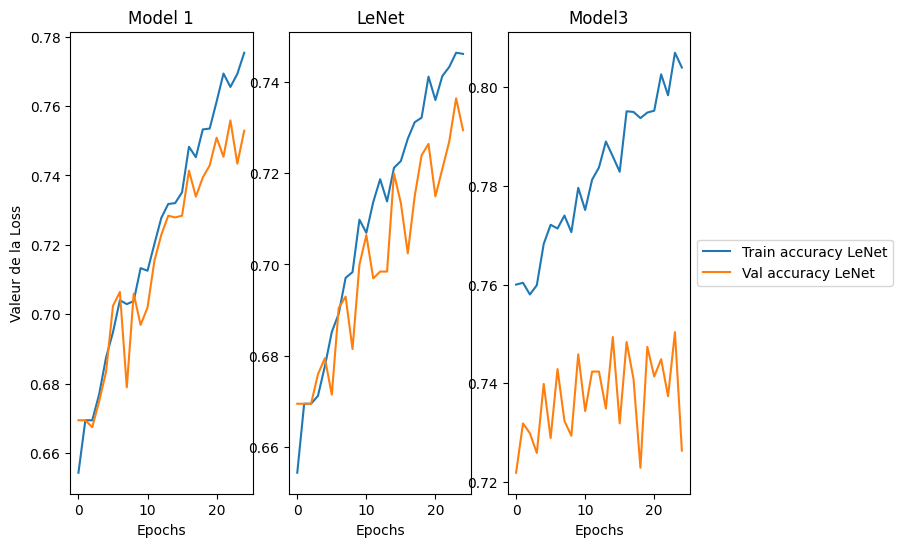

In [ ]:
##Plot the two models results
# TODO: Compute the accuracy of your model
##
loss_model1 = history.history['accuracy']
val_model1 = history.history['val_accuracy']
##LeNet model
loss_LeNet = history2.history['accuracy']
val_LeNet = history2.history['val_accuracy']
##LeNet model
loss_model3 = history3.history['accuracy']
val_model3 = history3.history['val_accuracy']

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
plt.plot(loss_model1,label = 'Train accuracy Model1')
plt.plot(val_model1, label = 'Val accuracy Model1')
plt.title("Model 1")

plt.xlabel('Epochs')
plt.ylabel('Valeur de la Loss')
plt.subplot(1, 3, 2)
plt.plot(loss_LeNet,label = 'Train accuracy LeNet')
plt.plot(val_LeNet, label = 'Val accuracy LeNet')
plt.title("LeNet")
plt.xlabel('Epochs')
plt.ylabel('')
plt.subplot(1, 3, 3)
plt.plot(loss_model3,label = 'Train accuracy LeNet')
plt.plot(val_model3, label = 'Val accuracy LeNet')
plt.title("Model3")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs')
plt.ylabel('')

ADD PICTURE MODIFYING WITH IMAGE DATAGENERATOR

In [ ]:
##DATA AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.5, 1.5),  # Adjust brightness
)



In [ ]:
# TODO: fit your ImageDataGenerator object
datagen.fit(X_train)
batch_size = 32

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

In [ ]:
###Trying the three model with X_train modifyed with ImageGenerator
##Model1
history_1_modif = model1.fit(train_generator,
                            validation_data=(X_test,y_test),
                            batch_size = 202,
                            epochs = 25,
                            callbacks = callback)

Epoch 1/25
251/251 [==============================] - 16s 63ms/step - loss: 1.1397 - accuracy: 0.6695 - val_loss: 2.0768 - val_accuracy: 0.6695
Epoch 2/25
251/251 [==============================] - 17s 68ms/step - loss: 1.1380 - accuracy: 0.6695 - val_loss: 1.3851 - val_accuracy: 0.6695
Epoch 3/25
251/251 [==============================] - 16s 63ms/step - loss: 1.1356 - accuracy: 0.6695 - val_loss: 1.8949 - val_accuracy: 0.6695
Epoch 4/25
251/251 [==============================] - 17s 66ms/step - loss: 1.1369 - accuracy: 0.6695 - val_loss: 1.2460 - val_accuracy: 0.6695
Epoch 5/25
251/251 [==============================] - 16s 63ms/step - loss: 1.1355 - accuracy: 0.6695 - val_loss: 1.7325 - val_accuracy: 0.6695
Epoch 6/25
251/251 [==============================] - 16s 63ms/step - loss: 1.1353 - accuracy: 0.6695 - val_loss: 3.0679 - val_accuracy: 0.6695
Epoch 7/25
251/251 [==============================] - 16s 64ms/step - loss: 1.1348 - accuracy: 0.6695 - val_loss: 2.2861 - val_accuracy:

In [ ]:
###Trying the three model with X_train modifyed with ImageGenerator
##Model2 /LeNet
history_2_modif = model_LeNet5.fit(train_generator,
                            validation_data=(X_test,y_test),
                            batch_size = 202,
                            epochs = 25,
                            callbacks = callback)

Epoch 1/25
63/63 [==============================] - 14s 205ms/step - loss: 1.4571 - accuracy: 0.6448 - val_loss: 1.3787 - val_accuracy: 0.6246
Epoch 2/25
63/63 [==============================] - 13s 199ms/step - loss: 1.1381 - accuracy: 0.6692 - val_loss: 2.6180 - val_accuracy: 0.6201
Epoch 3/25
63/63 [==============================] - 13s 200ms/step - loss: 1.1379 - accuracy: 0.6691 - val_loss: 2.5638 - val_accuracy: 0.6261
Epoch 4/25
63/63 [==============================] - 13s 198ms/step - loss: 1.1367 - accuracy: 0.6694 - val_loss: 1.1995 - val_accuracy: 0.6730
Epoch 5/25
63/63 [==============================] - 13s 200ms/step - loss: 1.1347 - accuracy: 0.6695 - val_loss: 1.0184 - val_accuracy: 0.6750
Epoch 6/25
63/63 [==============================] - 12s 197ms/step - loss: 1.1363 - accuracy: 0.6695 - val_loss: 1.4682 - val_accuracy: 0.6690
Epoch 7/25
63/63 [==============================] - 12s 197ms/step - loss: 1.1347 - accuracy: 0.6695 - val_loss: 1.9498 - val_accuracy: 0.6695

In [ ]:
###Trying the three model with X_train modifyed with ImageGenerator
##Model3
callback = [EarlyStopping(monitor='accuracy', patience=10)]

history_3_modif = model3.fit(X_train,y_train,
                            validation_data=(X_test,y_test),
                            batch_size = 202,
                            epochs = 25,
                            callbacks = callback)

Epoch 1/25
40/40 [==============================] - 5s 119ms/step - loss: 0.6939 - accuracy: 0.7440 - val_loss: 0.7263 - val_accuracy: 0.7324
Epoch 2/25
40/40 [==============================] - 5s 128ms/step - loss: 0.6884 - accuracy: 0.7460 - val_loss: 0.7223 - val_accuracy: 0.7399
Epoch 3/25
40/40 [==============================] - 5s 118ms/step - loss: 0.6952 - accuracy: 0.7495 - val_loss: 0.7254 - val_accuracy: 0.7399
Epoch 4/25
40/40 [==============================] - 6s 149ms/step - loss: 0.6770 - accuracy: 0.7493 - val_loss: 0.7303 - val_accuracy: 0.7394
Epoch 5/25
40/40 [==============================] - 4s 107ms/step - loss: 0.6731 - accuracy: 0.7512 - val_loss: 0.7098 - val_accuracy: 0.7409
Epoch 6/25
40/40 [==============================] - 5s 114ms/step - loss: 0.6783 - accuracy: 0.7470 - val_loss: 0.6993 - val_accuracy: 0.7414
Epoch 7/25
40/40 [==============================] - 6s 148ms/step - loss: 0.6596 - accuracy: 0.7572 - val_loss: 0.6909 - val_accuracy: 0.7439
Epoch 

Text(0, 0.5, '')

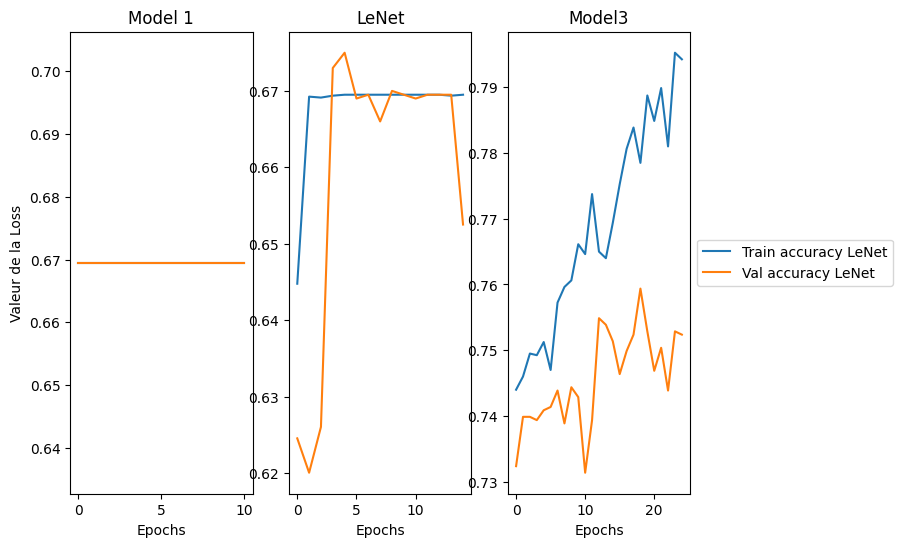

In [ ]:
##Plot the two models results
# TODO: Compute the accuracy of your model
##
loss_model1 = history_1_modif.history['accuracy']
val_model1 = history_1_modif.history['val_accuracy']
##LeNet model
loss_LeNet = history_2_modif.history['accuracy']
val_LeNet = history_2_modif.history['val_accuracy']
##LeNet model
loss_model3 = history_3_modif.history['accuracy']
val_model3 = history_3_modif.history['val_accuracy']

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
plt.plot(loss_model1,label = 'Train accuracy Model1')
plt.plot(val_model1, label = 'Val accuracy Model1')
plt.title("Model 1")

plt.xlabel('Epochs')
plt.ylabel('Valeur de la Loss')
plt.subplot(1, 3, 2)
plt.plot(loss_LeNet,label = 'Train accuracy LeNet')
plt.plot(val_LeNet, label = 'Val accuracy LeNet')
plt.title("LeNet")
plt.xlabel('Epochs')
plt.ylabel('')
plt.subplot(1, 3, 3)
plt.plot(loss_model3,label = 'Train accuracy LeNet')
plt.plot(val_model3, label = 'Val accuracy LeNet')
plt.title("Model3")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs')
plt.ylabel('')

DEALING WITH UNBALANCED DATASET

In [ ]:
# Instantiate the SMOTE resampler
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
##Smote only work with 2 dimensions
X_resampled, y_resampled = smote.fit_resample(X.drop('y', axis=1), y)

# Check the class distribution after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution after SMOTE resampling:", class_distribution)


Class distribution after SMOTE resampling: {0: 6705, 1: 6705, 2: 6705, 3: 6705, 4: 6705, 5: 6705, 6: 6705}


In [ ]:
##SHAPE OF X & y
X_resampled.shape, y_resampled.shape


,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,y
0,0.870588,0.756863,0.862745,0.909804,0.835294,0.909804,0.929412,0.843137,0.921569,0.921569,...,0.890196,0.831373,0.890196,0.874510,0.768627,0.854902,0.901961,0.827451,0.909804,2
1,0.835294,0.752941,0.756863,0.866667,0.800000,0.788235,0.870588,0.831373,0.870588,0.882353,...,0.886275,0.843137,0.862745,0.886275,0.827451,0.823529,0.886275,0.839216,0.858824,4
2,0.898039,0.556863,0.686275,0.901961,0.603922,0.686275,0.921569,0.631373,0.717647,0.901961,...,0.854902,0.517647,0.603922,0.835294,0.533333,0.615686,0.827451,0.545098,0.580392,5
3,0.796078,0.658824,0.662745,0.800000,0.662745,0.662745,0.831373,0.709804,0.705882,0.815686,...,0.596078,0.447059,0.486275,0.596078,0.462745,0.513725,0.513725,0.360784,0.372549,1
4,0.682353,0.643137,0.768627,0.678431,0.627451,0.721569,0.686275,0.631373,0.701961,0.717647,...,0.674510,0.588235,0.603922,0.643137,0.576471,0.560784,0.639216,0.576471,0.607843,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.945098,0.596078,0.639216,0.945098,0.592157,0.658824,0.937255,0.592157,0.654902,0.952941,...,0.933333,0.666667,0.623529,0.933333,0.647059,0.623529,0.913725,0.647059,0.607843,5
10011,0.635294,0.427451,0.376471,0.643137,0.415686,0.333333,0.643137,0.364706,0.329412,0.654902,...,0.607843,0.435294,0.431373,0.552941,0.415686,0.403922,0.439216,0.286275,0.223529,1
10012,0.960784,0.658824,0.737255,0.960784,0.678431,0.756863,0.952941,0.635294,0.717647,0.956863,...,0.913725,0.627451,0.658824,0.905882,0.619608,0.639216,0.850980,0.600000,0.615686,5
10013,0.882353,0.572549,0.600000,0.894118,0.560784,0.592157,0.870588,0.568627,0.588235,0.878431,...,0.811765,0.533333,0.545098,0.807843,0.517647,0.513725,0.772549,0.498039,0.478431,5


In [ ]:
##Prepare dataset to CNN
##Reshape X to 28,28,3
original_shape = (len(X_resampled), 28, 28, 3)
X_resampled = X_resampled.to_numpy()
X_resampled = X_resampled.reshape(original_shape)
y_resampled = to_categorical(y_resampled, num_classes=7)

X_resampled.shape, y_resampled.shape

((46935, 28, 28, 3), (46935, 7))

In [ ]:
##SPlit data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, stratify= y_resampled, test_size=0.2, random_state=42)
X_train_resampled.shape, y_train_resampled.shape, X_test_resampled.shape, y_test_resampled.shape

((37548, 28, 28, 3), (37548, 7), (9387, 28, 28, 3), (9387, 7))

In [ ]:
##rerun model 1
##Run model
history = model1.fit(X_train_resampled,y_train_resampled,
                            validation_data=(X_test_resampled,y_test_resampled),
                            batch_size = 202,
                            epochs = 25,
                            callbacks = callback)

Epoch 1/25
186/186 [==============================] - 42s 227ms/step - loss: 1.7190 - accuracy: 0.3394 - val_loss: 1.4625 - val_accuracy: 0.4084
Epoch 2/25
186/186 [==============================] - 42s 226ms/step - loss: 1.2910 - accuracy: 0.5117 - val_loss: 1.2363 - val_accuracy: 0.5225
Epoch 3/25
186/186 [==============================] - 38s 205ms/step - loss: 1.0567 - accuracy: 0.6019 - val_loss: 0.9755 - val_accuracy: 0.6271
Epoch 4/25
186/186 [==============================] - 39s 209ms/step - loss: 0.9196 - accuracy: 0.6514 - val_loss: 0.9217 - val_accuracy: 0.6482
Epoch 5/25
186/186 [==============================] - 40s 213ms/step - loss: 0.8272 - accuracy: 0.6871 - val_loss: 0.8066 - val_accuracy: 0.6948
Epoch 6/25
186/186 [==============================] - 38s 205ms/step - loss: 0.7601 - accuracy: 0.7153 - val_loss: 0.7623 - val_accuracy: 0.7133
Epoch 7/25
186/186 [==============================] - 37s 199ms/step - loss: 0.7047 - accuracy: 0.7399 - val_loss: 0.6926 - val_ac

TESTING CLASSICAL LINEAR MODEL FOR PREDICTION




In [ ]:
###IF WE WANT TO RESTART FROM THE FLATTEN CSV FILE
# Load the CSV file containing flattened image data and labels.
df = pd.read_csv('/content/skin_cancer_dataset/image_scaled_flatten.csv')

# Extract flattened image data and labels.
y = df['y'].values
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('labels_id', axis=1)
X = df

In [ ]:
##Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((8012, 2353), (8012,), (2003, 2353), (2003,))

In [ ]:
##LR
lr = LogisticRegression()
lr.fit(X_train, y_train)
acc_lr= accuracy_score(y_test, lr.predict(X_test))
acc_lr

ValueError: ignored

In [ ]:
acc_lr

0.9256115826260609

In [ ]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
acc_knn= accuracy_score(y_test, knn_model.predict(X_test))
acc_knn

0.8242636045931103

In [ ]:
###Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
acc_lda= accuracy_score(y_test, lda_model.predict(X_test))
acc_lda

0.6205691462805791

In [ ]:
##SVM model
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, clf.predict(X_test))


In [ ]:
acc_svm

1.0

In [ ]:
###Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, clf.predict(X_test))
acc_rf

0.7783325012481278

In [ ]:
##Write results
report_df_train.to_csv("Results_ML.csv")

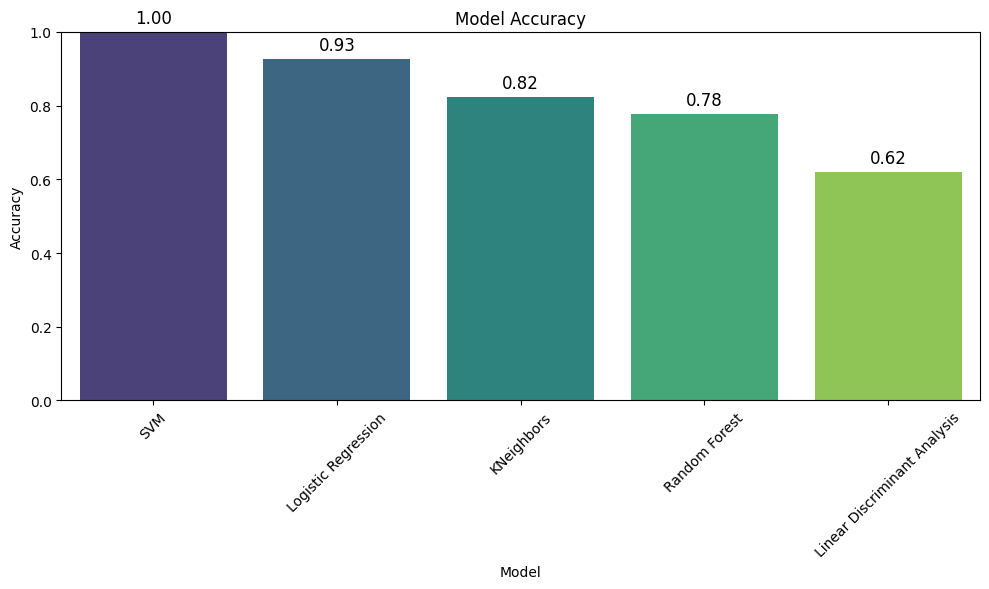

In [ ]:
##BARPLOT
data = {
    'Model': ['Logistic Regression', 'KNeighbors', 'Linear Discriminant Analysis', 'SVM', 'Random Forest'],
    'Accuracy': [0.9256, 0.8242, 0.6205, 1, 0.7783]
}
df = pd.DataFrame(data)
# Sort the DataFrame by accuracy in descending order
df = df.sort_values(by='Accuracy', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Model Accuracy')
plt.ylim(0, 1.0)  # Set y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()